In [210]:
from socceraction.data.wyscout import PublicWyscoutLoader
from socceraction.spadl.wyscout import convert_to_actions
from socceraction.spadl.config import actiontypes, bodyparts
import socceraction.spadl as spadl
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [211]:
api = PublicWyscoutLoader(root="data/wyscout")

In [212]:
# Competitions Input
competitions_df = api.competitions()
competitions_df

,competition_id,season_id,country_name,competition_name,competition_gender,season_name
0,524,181248,Italy,Italian first division,male,2017/2018
1,364,181150,England,English first division,male,2017/2018
2,795,181144,Spain,Spanish first division,male,2017/2018
3,412,181189,France,French first division,male,2017/2018
4,426,181137,Germany,German first division,male,2017/2018
5,102,9291,International,European Championship,male,2016
6,28,10078,International,World Cup,male,2018


In [213]:
# Games Input (Competition_id, Season_id)
games_england_df = api.games(28, 10078)
games_england_df

,game_id,competition_id,season_id,game_date,game_day,home_team_id,away_team_id
0,2058017,28,10078,2018-07-15 15:00:00,0,4418,9598
1,2058016,28,10078,2018-07-14 14:00:00,0,5629,2413
2,2058015,28,10078,2018-07-11 18:00:00,0,9598,2413
3,2058014,28,10078,2018-07-10 18:00:00,0,4418,5629
4,2058012,28,10078,2018-07-07 18:00:00,0,14358,9598
...,...,...,...,...,...,...,...
59,2057966,28,10078,2018-06-16 10:00:00,1,4418,8493
60,2057960,28,10078,2018-06-15 18:00:00,1,9905,1598
61,2057961,28,10078,2018-06-15 15:00:00,1,16216,10840
62,2057955,28,10078,2018-06-15 12:00:00,1,16129,15670


In [214]:
# Teams Input (game_id)
teams_england_df = api.teams(2057954)
teams_england_df.head()

,team_id,team_name_short,team_name
0,14358,Russia,Russia
1,16521,Saudi Arabia,Saudi Arabia


In [215]:
# Player Input (game_id)
players_df = api.players(2057954)
players_df

,player_id,nickname,firstname,lastname,birth_date,player_name,team_id,jersey_number,minutes_played,is_starter,game_id
0,101590,A. Dzagoev,Alan,Dzagoev,1990-06-17,Alan Dzagoev,14358,0,24,True,2057954
1,101699,A. Samedov,Alexandr,Samedov,1984-07-19,Alexandr Samedov,14358,0,66,True,2057954
2,101707,F. Smolov,Fyodor,Smolov,1990-02-09,Fyodor Smolov,14358,0,72,True,2057954
3,103668,I. Kutepov,Ilya,Kutepov,1993-07-29,Ilya Kutepov,14358,0,97,True,2057954
4,102157,Y. Gazinskiy,Yury,Gazinskiy,1989-07-20,Yury Gazinskiy,14358,0,97,True,2057954
5,41123,Mário Fernandes,Mário Figueira,Fernandes,1990-09-19,Mário Figueira Fernandes,14358,0,97,True,2057954
6,257800,A. Golovin,Aleksandr,Golovin,1996-05-30,Aleksandr Golovin,14358,0,97,True,2057954
7,103682,R. Zobnin,Roman,Zobnin,1994-02-11,Roman Zobnin,14358,0,97,True,2057954
8,101857,Y. Zhirkov,Yuri,Zhirkov,1983-08-20,Yuri Zhirkov,14358,0,97,True,2057954
9,101576,I. Akinfeev,Igor,Akinfeev,1986-04-08,Igor Akinfeev,14358,0,97,True,2057954


In [216]:
# Events Input (game_id)
event_england_df = api.events(2057954)
event_england_df['minutes_played'] = event_england_df['milliseconds'] / 60000
event_england_df

,event_id,game_id,period_id,milliseconds,team_id,player_id,type_id,type_name,subtype_id,subtype_name,positions,tags,minutes_played
0,258612104,2057954,1,1656.214,16521,122671,8,Pass,85,Simple pass,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",[{'id': 1801}],0.027604
1,258612106,2057954,1,4487.814,16521,139393,8,Pass,83,High pass,"[{'y': 53, 'x': 35}, {'y': 19, 'x': 75}]",[{'id': 1801}],0.074797
2,258612077,2057954,1,5937.411,14358,103668,1,Duel,10,Air duel,"[{'y': 81, 'x': 25}, {'y': 83, 'x': 37}]","[{'id': 703}, {'id': 1801}]",0.098957
3,258612112,2057954,1,6406.961,16521,122940,1,Duel,10,Air duel,"[{'y': 19, 'x': 75}, {'y': 17, 'x': 63}]","[{'id': 701}, {'id': 1802}]",0.106783
4,258612110,2057954,1,8562.167,16521,122847,8,Pass,85,Simple pass,"[{'y': 17, 'x': 63}, {'y': 15, 'x': 71}]",[{'id': 1801}],0.142703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,258614076,2057954,2,2870980.334,16521,122577,1,Duel,12,Ground defending duel,"[{'y': 30, 'x': 22}, {'y': 37, 'x': 23}]","[{'id': 501}, {'id': 1601}, {'id': 701}, {'id'...",47.849672
1585,258614077,2057954,2,2872843.120,16521,122577,2,Foul,20,Foul,"[{'y': 37, 'x': 23}, {'y': 30, 'x': 22}]",[{'id': 1702}],47.880719
1586,258613773,2057954,2,2939438.099,14358,257800,3,Free Kick,33,Free kick shot,"[{'y': 67, 'x': 81}, {'y': 0, 'x': 0}]","[{'id': 101}, {'id': 402}, {'id': 1101}, {'id'...",48.990635
1587,259141721,2057954,2,2943061.365,16521,122561,9,Save attempt,91,Save attempt,"[{'y': 100, 'x': 100}, {'y': 33, 'x': 19}]","[{'id': 101}, {'id': 1206}, {'id': 1802}]",49.051023


In [217]:
# Convert Wyscout to SPADL Format Input (Events Dataframe, home_team_id) --> Rusia
spadl_events_england_df = convert_to_actions(event_england_df, 14358)
spadl_events_england_df['time_seconds'] = spadl_events_england_df['time_seconds'].astype('float64')
spadl_events_england_df['timestamp'] = pd.to_datetime(spadl_events_england_df['time_seconds'], unit='s')
spadl_events_england_df

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,timestamp
0,2057954,1,1.656214,16521,122671,52.50,34.00,68.25,36.04,258612104,0,0,1,0,1970-01-01 00:00:01.656214000
1,2057954,1,4.487814,16521,139393,68.25,36.04,26.25,12.92,258612106,0,0,1,1,1970-01-01 00:00:04.487814000
2,2057954,1,6.524990,16521,122847,26.25,12.92,38.85,11.56,NaN,0,21,1,2,1970-01-01 00:00:06.524990499
3,2057954,1,8.562167,16521,122847,38.85,11.56,30.45,10.20,258612110,0,0,1,3,1970-01-01 00:00:08.562166999
4,2057954,1,10.991292,16521,122832,30.45,10.20,8.40,7.48,258612113,0,0,1,4,1970-01-01 00:00:10.991292000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,2057954,2,2868.496551,14358,103682,76.65,19.04,81.90,20.40,258613771,0,0,1,1215,1970-01-01 00:47:48.496551000
1216,2057954,2,2870.980334,16521,122577,81.90,20.40,80.85,25.16,258614076,0,9,0,1216,1970-01-01 00:47:50.980334000
1217,2057954,2,2872.843120,16521,122577,80.85,25.16,80.85,25.16,258614077,0,8,1,1217,1970-01-01 00:47:52.843120000
1218,2057954,2,2939.438099,14358,257800,85.05,22.44,105.00,30.60,258613773,0,13,1,1218,1970-01-01 00:48:59.438099000


In [218]:
# REVERSE COORDINATE (Home Team : Rusia)
spadl_events_england_df_reverse = spadl.play_left_to_right(spadl_events_england_df, 14358)
spadl_events_england_df_reverse

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,timestamp
0,2057954,1,1.656214,16521,122671,52.50,34.00,36.75,31.96,258612104,0,0,1,0,1970-01-01 00:00:01.656214000
1,2057954,1,4.487814,16521,139393,36.75,31.96,78.75,55.08,258612106,0,0,1,1,1970-01-01 00:00:04.487814000
2,2057954,1,6.524990,16521,122847,78.75,55.08,66.15,56.44,NaN,0,21,1,2,1970-01-01 00:00:06.524990499
3,2057954,1,8.562167,16521,122847,66.15,56.44,74.55,57.80,258612110,0,0,1,3,1970-01-01 00:00:08.562166999
4,2057954,1,10.991292,16521,122832,74.55,57.80,96.60,60.52,258612113,0,0,1,4,1970-01-01 00:00:10.991292000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,2057954,2,2868.496551,14358,103682,76.65,19.04,81.90,20.40,258613771,0,0,1,1215,1970-01-01 00:47:48.496551000
1216,2057954,2,2870.980334,16521,122577,23.10,47.60,24.15,42.84,258614076,0,9,0,1216,1970-01-01 00:47:50.980334000
1217,2057954,2,2872.843120,16521,122577,24.15,42.84,24.15,42.84,258614077,0,8,1,1217,1970-01-01 00:47:52.843120000
1218,2057954,2,2939.438099,14358,257800,85.05,22.44,105.00,30.60,258613773,0,13,1,1218,1970-01-01 00:48:59.438099000


In [219]:
# Convert Wyscout to SPADL Format Input (Events Dataframe, home_team_id) --> Arab Saudi
spadl_events_england_df = convert_to_actions(event_england_df, 16521)
spadl_events_england_df['time_seconds'] = spadl_events_england_df['time_seconds'].astype('float64')
spadl_events_england_df['timestamp'] = pd.to_datetime(spadl_events_england_df['time_seconds'], unit='s')
spadl_events_england_df

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,timestamp
0,2057954,1,1.656214,16521,122671,52.50,34.00,36.75,31.96,258612104,0,0,1,0,1970-01-01 00:00:01.656214000
1,2057954,1,4.487814,16521,139393,36.75,31.96,78.75,55.08,258612106,0,0,1,1,1970-01-01 00:00:04.487814000
2,2057954,1,6.524990,16521,122847,78.75,55.08,66.15,56.44,NaN,0,21,1,2,1970-01-01 00:00:06.524990499
3,2057954,1,8.562167,16521,122847,66.15,56.44,74.55,57.80,258612110,0,0,1,3,1970-01-01 00:00:08.562166999
4,2057954,1,10.991292,16521,122832,74.55,57.80,96.60,60.52,258612113,0,0,1,4,1970-01-01 00:00:10.991292000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,2057954,2,2868.496551,14358,103682,28.35,48.96,23.10,47.60,258613771,0,0,1,1215,1970-01-01 00:47:48.496551000
1216,2057954,2,2870.980334,16521,122577,23.10,47.60,24.15,42.84,258614076,0,9,0,1216,1970-01-01 00:47:50.980334000
1217,2057954,2,2872.843120,16521,122577,24.15,42.84,24.15,42.84,258614077,0,8,1,1217,1970-01-01 00:47:52.843120000
1218,2057954,2,2939.438099,14358,257800,19.95,45.56,0.00,37.40,258613773,0,13,1,1218,1970-01-01 00:48:59.438099000


In [220]:
# REVERSE COORDINATE (Home Team : Arab Saudi)
spadl_events_england_df_reverse = spadl.play_left_to_right(spadl_events_england_df, 16521)
spadl_events_england_df_reverse

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,timestamp
0,2057954,1,1.656214,16521,122671,52.50,34.00,36.75,31.96,258612104,0,0,1,0,1970-01-01 00:00:01.656214000
1,2057954,1,4.487814,16521,139393,36.75,31.96,78.75,55.08,258612106,0,0,1,1,1970-01-01 00:00:04.487814000
2,2057954,1,6.524990,16521,122847,78.75,55.08,66.15,56.44,NaN,0,21,1,2,1970-01-01 00:00:06.524990499
3,2057954,1,8.562167,16521,122847,66.15,56.44,74.55,57.80,258612110,0,0,1,3,1970-01-01 00:00:08.562166999
4,2057954,1,10.991292,16521,122832,74.55,57.80,96.60,60.52,258612113,0,0,1,4,1970-01-01 00:00:10.991292000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,2057954,2,2868.496551,14358,103682,76.65,19.04,81.90,20.40,258613771,0,0,1,1215,1970-01-01 00:47:48.496551000
1216,2057954,2,2870.980334,16521,122577,23.10,47.60,24.15,42.84,258614076,0,9,0,1216,1970-01-01 00:47:50.980334000
1217,2057954,2,2872.843120,16521,122577,24.15,42.84,24.15,42.84,258614077,0,8,1,1217,1970-01-01 00:47:52.843120000
1218,2057954,2,2939.438099,14358,257800,85.05,22.44,105.00,30.60,258613773,0,13,1,1218,1970-01-01 00:48:59.438099000


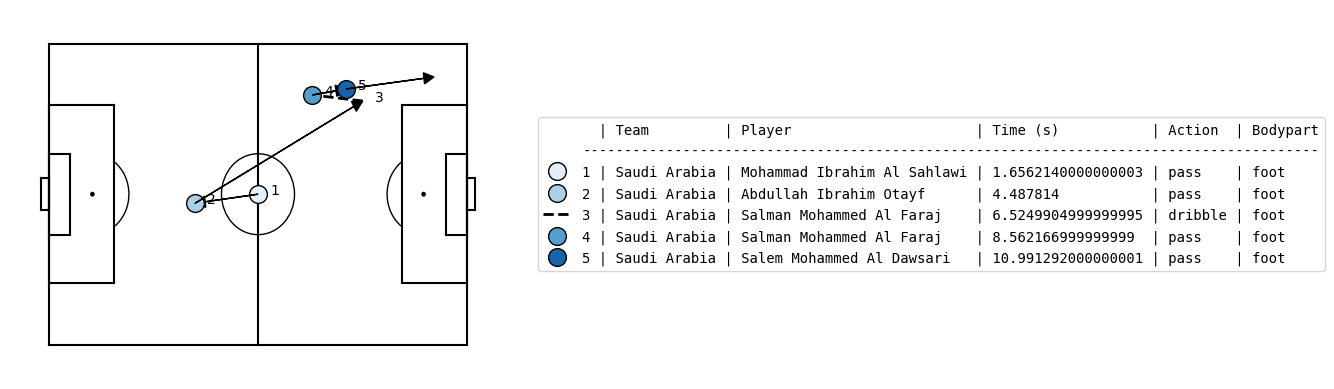

In [221]:
import matplotsoccer as mps

df_sample_beginning = spadl_events_england_df[:5]
df_sample_beginning = spadl.add_names(df_sample_beginning)
df_sample_beginning = df_sample_beginning.merge(teams_england_df).merge(players_df)
df_sample_beginning["action_name"] = df_sample_beginning.apply(lambda x : actiontypes[x["type_id"]], axis=1)
df_sample_beginning["bodypart_name"] = df_sample_beginning.apply(lambda x : bodyparts[x["bodypart_id"]], axis=1)

mps.actions(
    location=df_sample_beginning[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_sample_beginning.action_name,
    team=df_sample_beginning.team_name,
    result=df_sample_beginning.result_id == 1,
    label=df_sample_beginning[["team_name", "player_name", "time_seconds", "action_name", "bodypart_name"]],
    labeltitle=["Team", "Player", "Time (s)", "Action", "Bodypart"],
    zoom=False
)

In [222]:
# Modify spadl to gamestate
from socceraction.vaep.features import gamestates

list_gamestates = gamestates(spadl_events_england_df, 3)
list_gamestates[0]

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\socceraction\vaep\features.py:92: FutureWarning: Passing <class 'int'> to shift is deprecated and will raise in a future version, pass Timestamp instead.
  prev_actions = actions.copy().shift(i, fill_value=0)


,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,timestamp
0,2057954,1,1.656214,16521,122671,52.50,34.00,36.75,31.96,258612104,0,0,1,0,1970-01-01 00:00:01.656214000
1,2057954,1,4.487814,16521,139393,36.75,31.96,78.75,55.08,258612106,0,0,1,1,1970-01-01 00:00:04.487814000
2,2057954,1,6.524990,16521,122847,78.75,55.08,66.15,56.44,NaN,0,21,1,2,1970-01-01 00:00:06.524990499
3,2057954,1,8.562167,16521,122847,66.15,56.44,74.55,57.80,258612110,0,0,1,3,1970-01-01 00:00:08.562166999
4,2057954,1,10.991292,16521,122832,74.55,57.80,96.60,60.52,258612113,0,0,1,4,1970-01-01 00:00:10.991292000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,2057954,2,2868.496551,14358,103682,28.35,48.96,23.10,47.60,258613771,0,0,1,1215,1970-01-01 00:47:48.496551000
1216,2057954,2,2870.980334,16521,122577,23.10,47.60,24.15,42.84,258614076,0,9,0,1216,1970-01-01 00:47:50.980334000
1217,2057954,2,2872.843120,16521,122577,24.15,42.84,24.15,42.84,258614077,0,8,1,1217,1970-01-01 00:47:52.843120000
1218,2057954,2,2939.438099,14358,257800,19.95,45.56,0.00,37.40,258613773,0,13,1,1218,1970-01-01 00:48:59.438099000


In [223]:
# VAEP Label Score / Not score
import socceraction.vaep.labels as lab
import pandas as pd

yfns = [lab.scores, lab.concedes, lab.goal_from_shot]
label_Y_events_england_df = pd.concat([fn(spadl.add_names(spadl_events_england_df)) for fn in yfns], axis=1)
spadl_events_england_with_Y_df = pd.concat([spadl_events_england_df, label_Y_events_england_df], axis=1)
spadl_events_england_with_Y_df.head()

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,timestamp,scores,concedes,goal_from_shot
0,2057954,1,1.656214,16521,122671,52.50,34.00,36.75,31.96,258612104,0,0,1,0,1970-01-01 00:00:01.656214000,False,False,False
1,2057954,1,4.487814,16521,139393,36.75,31.96,78.75,55.08,258612106,0,0,1,1,1970-01-01 00:00:04.487814000,False,False,False
2,2057954,1,6.524990,16521,122847,78.75,55.08,66.15,56.44,NaN,0,21,1,2,1970-01-01 00:00:06.524990499,False,False,False
3,2057954,1,8.562167,16521,122847,66.15,56.44,74.55,57.80,258612110,0,0,1,3,1970-01-01 00:00:08.562166999,False,False,False
4,2057954,1,10.991292,16521,122832,74.55,57.80,96.60,60.52,258612113,0,0,1,4,1970-01-01 00:00:10.991292000,False,False,False
